In [1]:
import os
import mahotas as mt
import cv2 as cv
import glob
import numpy as np
import csv
import re
import count_train
import count_test
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
import keras

/home/ln-2/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Dataset

### A set of 202 diseased(1- algal leaf spot, 2- blister blight, 3- grey spot) and healthy(0) tea leaves are collected as dataset from High Field Tea Estate, Coonoor, Tamil Nadu, India.

## The Next Step is Image Segmentation.

#### A python script file is used for background removal and extraction of area of interest.

#### Image Augmentation is done to increase the dataset.

## The Next Step is the Feature Extraction. 

#### 13 Texture Features( Haralick features are used).
#### Color Features
#### Shape Features

In [4]:
def extract_feature(image):
	
	##Color Feature
	(mean,std) = cv.meanStdDev(image)
	
	#print(len(mean), type(mean))
	
	#print(len(std), type(std))
	
	color_feature = np.array(mean)
	
	color_feature = np.concatenate([color_feature,std]).flatten()
	
	#print(len(color_feature))
	
	##Texture Feature
	gray = cv.cvtColor(image,cv.COLOR_BGR2GRAY)
	
	textures = mt.features.haralick(gray)
	
	ht_mean = textures.mean(axis = 0)
	
	#print(len(ht_mean), type(ht_mean))
	
	
	## Shape Features
	ret,thresh = cv.threshold(gray,127,255,0)
	
	x,contours, hierarchy =   cv.findContours(thresh.copy(),1,2)
	
	cnt = contours[0]
	
	area = cv.contourArea(cnt)
	#print(type(area))
	
	perimeter = cv.arcLength(cnt,True)
	#print(type(perimeter))
	
	shape = np.array([])
	shape = np.append(shape,area)
	shape = np.append(shape,perimeter)
	#print(len(shape))
	
	
	#print(len(ht_mean) + len(std) + len(mean) + len(shape))
	
	ht_mean = np.concatenate([ht_mean,color_feature]).flatten()
	
	ht_mean = np.concatenate([ht_mean,shape]).flatten()
	
	print(len(ht_mean),ht_mean.shape)
	
	return(ht_mean)

# Creating Comma-Seperating file

#### A CSV file, having 21 features (13 texture features, 6 color features and 2 shape featrures) and appropriate label(0- Healthy, 1- Algal Leaf Spot, 2- blister blight, 3- Grey Spot), is created.

In [5]:
def create_csv(pa):	
	if(pa == 'train'):
		files = count_train.images()
		path = '/home/ln-2/Desktop/Project/disease-final/train'
	else:
		files = count_test.images()
		path = '/home/ln-2/Desktop/Project/disease-final/test'

	mydata = [['energy','contrast','correlation','variance','inverse difference moment','sum average','sum variance',
               'sum entropy','entropy','difference variance','difference entropy','info_corr',
			   'maximal_corr_coeff','mean_B','mean_G','mean_R','std_B','std_G','std_R','area','perimeter','label']]

	
	print(path)
	for file in files:	
		#print(path+ file)
		image = cv.imread(path + '/' + file)
		#print(file)
		#gray = cv.cvtColor(image,cv.COLOR_BGR2GRAY)
		#means = cv.mean(image)
		#print(len(means))
		#print(image.shape)
		dim = (512,512)
		r_img = cv.resize(image,dim)
		print(r_img.shape)
		feature = extract_feature(r_img)
		label = 0
		
		## Healthy leaf is labeled as 0.
		if(re.search('test[1-9]+',file)):
			label = 0
		else:
			## Algal leaf spot is labeled as 1.
			if(re.search('algal[1-9]+',file)):
				label = 1
			## Blister Blight is labeled as 2.	
			elif(re.search('blister[1-9]+',file)):
				label = 2
			## Grey Spot is labled as 3.	
			elif(re.search('grey[1-9]+',file)):
				label = 3
		
		feature = np.append(feature,label)
		#print(len(feature))
		print()
		feature = feature.tolist()
		mydata.append(feature)

	myfile = open(pa+'.csv','w')
	with myfile:
        	writer = csv.writer(myfile)
        	writer.writerows(mydata)


In [6]:
create_csv('train')

1680
/home/ln-2/Desktop/Project/disease-final/train
(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3

21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 

21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 

21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21

In [7]:
create_csv('test')

336
/home/ln-2/Desktop/Project/disease-final/test
(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)
21 (21,)

(512, 512, 3)


## Importing Panda Library and matplotlib library

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
myfile = pd.read_csv('train.csv',sep=',')

In [10]:
myfile.head()

,energy,contrast,correlation,variance,inverse difference moment,sum average,sum variance,sum entropy,entropy,difference variance,...,maximal_corr_coeff,mean_B,mean_G,mean_R,std_B,std_G,std_R,area,perimeter,label
0,0.030158,199.684128,0.979328,4831.822712,0.370889,240.317971,19127.606719,7.329885,10.510277,0.000462,...,0.995933,30.229214,149.039322,96.878613,46.481974,82.611132,64.496761,2.0,5.656854,0.0
1,0.404433,53.612163,0.994288,4692.440002,0.750862,83.946212,18716.147846,3.930757,5.098740,0.001904,...,0.990154,39.052807,52.949215,21.130882,65.837942,81.733283,51.179915,0.0,0.000000,0.0
2,0.214517,91.753874,0.990419,4787.952919,0.608841,127.890807,19060.057801,5.309484,7.138367,0.001175,...,0.995160,46.987793,87.492199,23.585911,54.053327,92.154831,41.901940,2.0,5.656854,0.0
3,0.264462,70.453784,0.993650,5547.046891,0.715987,118.477812,22117.733782,4.992406,6.269899,0.001608,...,0.997528,63.761543,79.834648,16.526382,81.117143,97.135152,46.029935,2.0,5.656854,0.0
4,0.816997,29.531462,0.984987,983.260733,0.936171,16.793626,3903.511472,1.162007,1.446217,0.003915,...,0.848632,8.737453,11.750637,1.600243,33.021975,43.706347,10.871997,0.0,4.828427,0.0


In [11]:
myfile.tail()

,energy,contrast,correlation,variance,inverse difference moment,sum average,sum variance,sum entropy,entropy,difference variance,...,maximal_corr_coeff,mean_B,mean_G,mean_R,std_B,std_G,std_R,area,perimeter,label
1675,0.600017,31.891878,0.989126,1466.151091,0.842555,35.844680,5832.712486,2.475036,3.187111,0.002686,...,0.957606,18.106228,24.761002,4.249416,39.259281,52.444218,13.670498,0.0,0.000000,0.0
1676,0.052369,20.066240,0.986136,723.817872,0.565398,67.402160,2875.205249,6.205351,8.079562,0.001349,...,0.997578,38.293427,38.115753,23.007015,32.696359,29.857899,19.954715,3.5,9.414214,1.0
1677,0.150147,92.612277,0.994027,7752.614360,0.582394,190.691280,30917.845163,5.930033,7.768567,0.001096,...,0.997924,56.202976,113.059254,74.655701,71.585250,102.495946,71.355149,2.0,5.656854,0.0
1678,0.088502,100.323597,0.991295,5763.352954,0.557047,199.580877,22953.088218,6.448058,8.403321,0.001054,...,0.998729,56.236919,120.028797,75.749989,66.972561,89.705596,60.978766,0.0,2.000000,0.0
1679,0.803964,25.496210,0.993922,2096.815393,0.935087,25.664543,8361.765362,1.274404,1.556533,0.003282,...,0.876832,14.233849,17.171062,3.653725,51.178212,61.161377,21.249690,2.0,5.656854,0.0


In [12]:
myfile = myfile.dropna()

In [13]:
myfile[47:]['difference entropy']

47      0.891451
48      2.622670
49      2.475431
50      2.598009
51      3.581408
52      1.208988
53      2.971672
54      1.573636
55      3.615737
56      2.250968
57      1.718471
58      1.309829
59      0.812751
60      2.900784
61      1.844897
62      1.723042
63      1.221433
64      1.725659
65      1.030267
66      2.736714
67      0.891186
68      1.206683
69      2.565716
70      1.256301
71      1.191305
72      1.256278
73      1.186894
74      1.256719
75      1.143734
76      2.676710
          ...   
1650    1.122541
1651    2.784405
1652    1.347858
1653    1.581489
1654    1.230130
1655    2.585388
1656    2.824704
1657    1.258110
1658    1.383643
1659    2.956695
1660    3.030812
1661    1.132312
1662    0.937370
1663    3.585272
1664    3.468337
1665    3.035639
1666    0.857617
1667    3.047792
1668    1.270688
1669    3.556515
1670    1.751920
1671    1.722928
1672    1.413873
1673    1.132989
1674    2.610729
1675    1.411259
1676    2.587310
1677    2.7000

### Seperating the labels

In [14]:
train_data = myfile.iloc[:,:-1]

In [15]:
train_label = myfile.iloc[:,-1]

In [16]:
train_label = train_label.astype(int)

## Statistical Analysis

Text(0.5,1,'Correlation between features')

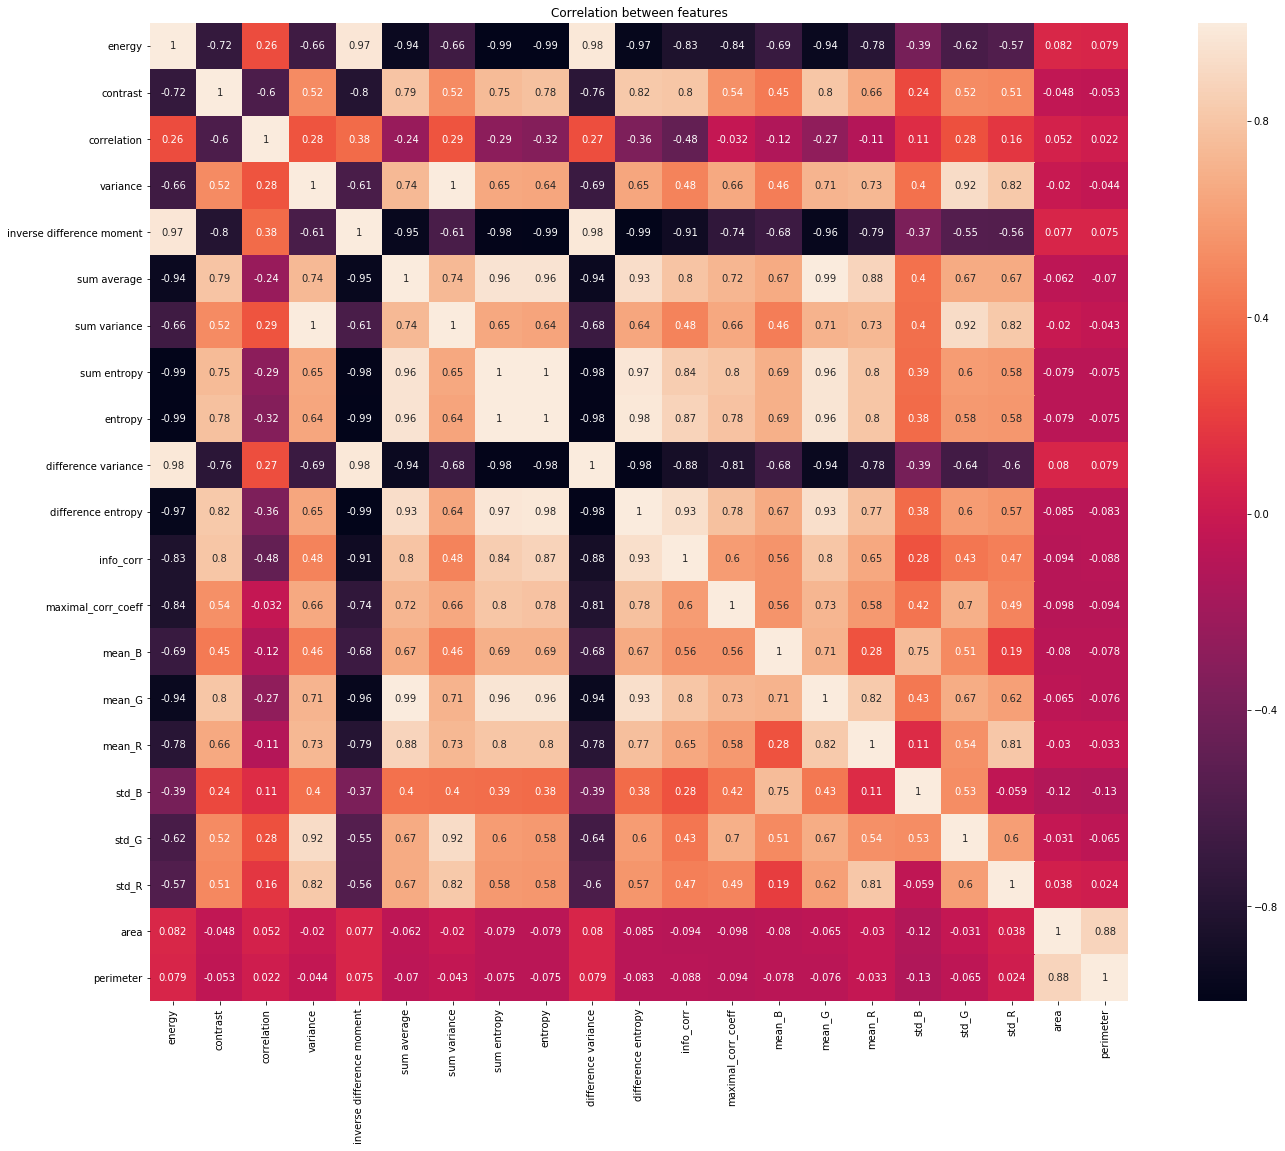

In [17]:
plt.figure(figsize=(25,18))
corr = train_data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, square=True,annot=True,linecolor="black") #cmap='YlGnBu',
plt.title("Correlation between features")

In [18]:
from sklearn import preprocessing

In [19]:
standard = preprocessing.StandardScaler()

In [20]:
min_element = []
max_element = []

In [21]:
train_label.describe()

count    1680.000000
mean        0.127976
std         0.546517
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         3.000000
Name: label, dtype: float64

In [22]:
train_data['energy'].describe()

count    1680.000000
mean        0.444974
std         0.277493
min         0.004525
25%         0.143626
50%         0.563750
75%         0.673973
max         0.842096
Name: energy, dtype: float64

In [23]:
min_element.append(train_data['energy'].min())
max_element.append(train_data['energy'].max())

In [24]:
train_data['energy'] = (train_data['energy'] - train_data['energy'].min())/(train_data['energy'].max() - train_data['energy'].min()) 

/home/ln-2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [25]:
train_data['energy'].describe()

count    1680.000000
mean        0.525864
std         0.331307
min         0.000000
25%         0.166076
50%         0.667675
75%         0.799273
max         1.000000
Name: energy, dtype: float64

In [26]:
train_data['contrast'].describe()

count    1680.000000
mean       66.362173
std        39.687524
min        15.572684
25%        37.501256
50%        53.279523
75%        80.976500
max       216.376098
Name: contrast, dtype: float64

In [27]:
min_element.append(train_data['contrast'].min())
max_element.append(train_data['contrast'].max())

In [28]:
train_data['contrast'] = (train_data['contrast'] - train_data['contrast'].min())/(train_data['contrast'].max() - train_data['contrast'].min())

/home/ln-2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [29]:
train_data['contrast'].describe()

count    1680.000000
mean        0.252931
std         0.197644
min         0.000000
25%         0.109204
50%         0.187780
75%         0.325711
max         1.000000
Name: contrast, dtype: float64

In [30]:
train_data['correlation'].describe()

count    1680.000000
mean        0.990497
std         0.004209
min         0.973726
25%         0.988373
50%         0.991228
75%         0.993584
max         0.998267
Name: correlation, dtype: float64

In [31]:
train_data = train_data.drop('correlation', 1)

In [32]:
train_data['variance'].describe()

count     1680.000000
mean      3702.219634
std       1673.910730
min        723.765969
25%       2533.162634
50%       3457.973257
75%       4692.290796
max      10236.008787
Name: variance, dtype: float64

In [33]:
min_element.append(train_data['variance'].min())
max_element.append(train_data['variance'].max())

In [34]:
train_data['variance'] = (train_data['variance'] - train_data['variance'].min())/(train_data['variance'].max() - train_data['variance'].min())

In [35]:
train_data['variance'].describe()

count    1680.000000
mean        0.313118
std         0.175974
min         0.000000
25%         0.190218
50%         0.287441
75%         0.417202
max         1.000000
Name: variance, dtype: float64

In [36]:
train_data['inverse difference moment'].describe()

count    1680.000000
mean        0.746473
std         0.177117
min         0.295636
25%         0.581248
50%         0.844889
75%         0.883987
max         0.943054
Name: inverse difference moment, dtype: float64

In [37]:
min_element.append(train_data['inverse difference moment'].min())
max_element.append(train_data['inverse difference moment'].max())

In [38]:
train_data['inverse difference moment'] = (train_data['inverse difference moment'] - train_data['inverse difference moment'].min())/(train_data['inverse difference moment'].max() - train_data['inverse difference moment'].min())

In [39]:
train_data['inverse difference moment'].describe()

count    1680.000000
mean        0.696362
std         0.273575
min         0.000000
25%         0.441155
50%         0.848374
75%         0.908765
max         1.000000
Name: inverse difference moment, dtype: float64

In [40]:
train_data['sum average'].describe()

count    1680.000000
mean       95.531224
std        72.458364
min        16.738055
25%        40.530996
50%        58.503770
75%       147.852547
max       286.639831
Name: sum average, dtype: float64

In [41]:
min_element.append(train_data['sum average'].min())
max_element.append(train_data['sum average'].max())

In [42]:
train_data['sum average'] = (train_data['sum average'] - train_data['sum average'].min())/(train_data['sum average'].max() - train_data['sum average'].min())

In [43]:
train_data['sum average'].describe()

count    1680.000000
mean        0.291933
std         0.268462
min         0.000000
25%         0.088154
50%         0.154744
75%         0.485786
max         1.000000
Name: sum average, dtype: float64

In [44]:
train_data['sum variance'].describe()

count     1680.000000
mean     14742.516363
std       6674.923487
min       2875.027328
25%      10080.801675
50%      13748.161914
75%      18643.319594
max      40837.009914
Name: sum variance, dtype: float64

In [45]:
min_element.append(train_data['sum variance'].min())
max_element.append(train_data['sum variance'].max())

In [46]:
train_data['sum variance'] = (train_data['sum variance'] - train_data['sum variance'].min())/(train_data['sum variance'].max() - train_data['sum variance'].min())

In [47]:
train_data['sum variance'].describe()

count    1680.000000
mean        0.312615
std         0.175832
min         0.000000
25%         0.189816
50%         0.286422
75%         0.415371
max         1.000000
Name: sum variance, dtype: float64

In [48]:
train_data['sum entropy'].describe()

count    1680.000000
mean        3.814448
std         2.154888
min         1.065154
25%         2.099283
50%         2.778594
75%         5.913019
max         8.098256
Name: sum entropy, dtype: float64

In [49]:
min_element.append(train_data['sum entropy'].min())
max_element.append(train_data['sum entropy'].max())

In [50]:
train_data['sum entropy'] = (train_data['sum entropy'] - train_data['sum entropy'].min())/(train_data['sum entropy'].max() - train_data['sum entropy'].min())

In [51]:
train_data['sum entropy'].describe()

count    1680.000000
mean        0.390908
std         0.306392
min         0.000000
25%         0.147037
50%         0.243625
75%         0.689293
max         1.000000
Name: sum entropy, dtype: float64

In [52]:
train_data['entropy'].describe()

count    1680.000000
mean        4.973884
std         2.981077
min         1.319677
25%         2.629884
50%         3.432498
75%         7.766195
max        11.603657
Name: entropy, dtype: float64

In [53]:
min_element.append(train_data['entropy'].min())
max_element.append(train_data['entropy'].max())

In [54]:
train_data['entropy'] = (train_data['entropy'] - train_data['entropy'].min())/(train_data['entropy'].max() - train_data['entropy'].min())

In [55]:
train_data['entropy'].describe()

count    1680.000000
mean        0.355330
std         0.289876
min         0.000000
25%         0.127403
50%         0.205448
75%         0.626851
max         1.000000
Name: entropy, dtype: float64

In [56]:
train_data['difference variance'].describe()

count    1680.000000
mean        0.002137
std         0.000971
min         0.000354
25%         0.001108
50%         0.002549
75%         0.002913
max         0.003915
Name: difference variance, dtype: float64

In [57]:
min_element.append(train_data['difference variance'].min())
max_element.append(train_data['difference variance'].max())

In [58]:
train_data['difference variance'] = (train_data['difference variance'] - train_data['difference variance'].min())/(train_data['difference variance'].max() - train_data['difference variance'].min())

In [59]:
train_data['difference variance'].describe()

count    1680.000000
mean        0.500872
std         0.272657
min         0.000000
25%         0.211748
50%         0.616533
75%         0.718635
max         1.000000
Name: difference variance, dtype: float64

In [60]:
train_data['difference entropy'].describe()

count    1680.000000
mean        1.845268
std         0.924321
min         0.639086
25%         1.113816
50%         1.409053
75%         2.638110
max         4.178119
Name: difference entropy, dtype: float64

In [61]:
min_element.append(train_data['difference entropy'].min())
max_element.append(train_data['difference entropy'].max())

In [62]:
train_data['difference entropy'] = (train_data['difference entropy'] - train_data['difference entropy'].min())/(train_data['difference entropy'].max() - train_data['difference entropy'].min())

In [63]:
train_data['difference entropy'].describe()

count    1680.000000
mean        0.340823
std         0.261179
min         0.000000
25%         0.134141
50%         0.217564
75%         0.564850
max         1.000000
Name: difference entropy, dtype: float64

In [64]:
train_data['info_corr'].describe()

count    1680.000000
mean       -0.568042
std         0.067686
min        -0.672768
25%        -0.615976
50%        -0.593149
75%        -0.524953
max        -0.370919
Name: info_corr, dtype: float64

In [65]:
train_data = train_data.drop('info_corr', 1)

In [66]:
train_data['maximal_corr_coeff'].describe()

count    1680.000000
mean        0.964890
std         0.037080
min         0.834630
25%         0.944162
50%         0.974103
75%         0.997465
max         0.999605
Name: maximal_corr_coeff, dtype: float64

In [67]:
train_data = train_data.drop('maximal_corr_coeff', 1)

In [68]:
train_data['mean_B'].describe()

count    1680.000000
mean       29.974350
std        26.098566
min         0.906940
25%        12.527122
50%        22.868309
75%        37.543470
max       130.789696
Name: mean_B, dtype: float64

In [69]:
min_element.append(train_data['mean_B'].min())
max_element.append(train_data['mean_B'].max())

In [70]:
train_data['mean_B'] = (train_data['mean_B'] - train_data['mean_B'].min())/(train_data['mean_B'].max() - train_data['mean_B'].min())

In [71]:
train_data['mean_B'].describe()

count    1680.000000
mean        0.223797
std         0.200939
min         0.000000
25%         0.089467
50%         0.169086
75%         0.282074
max         1.000000
Name: mean_B, dtype: float64

In [72]:
train_data['mean_G'].describe()

count    1680.000000
mean       59.870114
std        44.555822
min        11.157841
25%        26.286707
50%        37.541286
75%        93.566280
max       168.683567
Name: mean_G, dtype: float64

In [73]:
min_element.append(train_data['mean_G'].min())
max_element.append(train_data['mean_G'].max())

In [74]:
train_data['mean_G'] = (train_data['mean_G'] - train_data['mean_G'].min())/(train_data['mean_G'].max() - train_data['mean_G'].min())

In [75]:
train_data['mean_G'].describe()

count    1680.000000
mean        0.309234
std         0.282848
min         0.000000
25%         0.096041
50%         0.167487
75%         0.523143
max         1.000000
Name: mean_G, dtype: float64

In [76]:
train_data['mean_R'].describe()

count    1680.000000
mean       30.360551
std        31.112819
min         0.971420
25%         7.255718
50%        16.998598
75%        43.627497
max       130.822411
Name: mean_R, dtype: float64

In [77]:
min_element.append(train_data['mean_R'].min())
max_element.append(train_data['mean_R'].max())

In [78]:
train_data['mean_R'] = (train_data['mean_R'] - train_data['mean_R'].min())/(train_data['mean_R'].max() - train_data['mean_R'].min())

In [79]:
train_data['mean_R'].describe()

count    1680.000000
mean        0.226330
std         0.239604
min         0.000000
25%         0.048396
50%         0.123427
75%         0.328500
max         1.000000
Name: mean_R, dtype: float64

In [80]:
train_data['std_B'].describe()

count    1680.000000
mean       47.586301
std        18.639403
min         5.822116
25%        34.457560
50%        48.835438
75%        61.258222
max        99.473150
Name: std_B, dtype: float64

In [81]:
min_element.append(train_data['std_B'].min())
max_element.append(train_data['std_B'].max())

In [82]:
train_data['std_B'] = (train_data['std_B'] - train_data['std_B'].min())/(train_data['std_B'].max() - train_data['std_B'].min())

In [83]:
train_data['std_B'].describe()

count    1680.000000
mean        0.445955
std         0.199030
min         0.000000
25%         0.305768
50%         0.459294
75%         0.591943
max         1.000000
Name: std_B, dtype: float64

In [84]:
train_data['std_G'].describe()

count    1680.000000
mean       73.405050
std        14.979619
min        29.857774
25%        63.991820
50%        73.028753
75%        84.885906
max       117.608446
Name: std_G, dtype: float64

In [85]:
min_element.append(train_data['std_G'].min())
max_element.append(train_data['std_G'].max())

In [86]:
train_data['std_G'] = (train_data['std_G'] - train_data['std_G'].min())/(train_data['std_G'].max() - train_data['std_G'].min())

In [87]:
train_data['std_G'].describe()

count    1680.000000
mean        0.496261
std         0.170707
min         0.000000
25%         0.388989
50%         0.491973
75%         0.627096
max         1.000000
Name: std_G, dtype: float64

In [88]:
train_data['std_R'].describe()

count    1680.000000
mean       42.964595
std        20.916497
min         6.020603
25%        23.814229
50%        43.739204
75%        60.118211
max        99.453988
Name: std_R, dtype: float64

In [89]:
min_element.append(train_data['std_R'].min())
max_element.append(train_data['std_R'].max())

In [90]:
train_data['std_R'] = (train_data['std_R'] - train_data['std_R'].min())/(train_data['std_R'].max() - train_data['std_R'].min())

In [91]:
train_data['std_R'].describe()

count    1680.000000
mean        0.395405
std         0.223865
min         0.000000
25%         0.190442
50%         0.403695
75%         0.578997
max         1.000000
Name: std_R, dtype: float64

In [92]:
train_data['area'].describe()

count     1680.000000
mean       177.191964
std       2009.376323
min          0.000000
25%          0.000000
50%          2.000000
75%          4.000000
max      33683.000000
Name: area, dtype: float64

In [93]:
train_data = train_data.drop('area', 1)

In [94]:
train_data['perimeter'].describe()

count    1680.000000
mean       16.923973
std        76.967992
min         0.000000
25%         3.414214
50%         5.656854
75%         9.474874
max      1119.467158
Name: perimeter, dtype: float64

In [95]:
train_data = train_data.drop('perimeter', 1)

In [96]:
train_data = train_data.drop('entropy', 1)

In [97]:
train_data.head()

,energy,contrast,variance,inverse difference moment,sum average,sum variance,sum entropy,difference variance,difference entropy,mean_B,mean_G,mean_R,std_B,std_G,std_R
0,0.030604,0.916874,0.431870,0.116235,0.828375,0.428128,0.890749,0.030462,0.915746,0.225760,0.875295,0.738594,0.434163,0.601173,0.625859
1,0.477461,0.189436,0.417217,0.703140,0.249010,0.417289,0.407445,0.435196,0.404736,0.293695,0.265299,0.155251,0.640845,0.591169,0.483332
2,0.250715,0.379382,0.427259,0.483776,0.411827,0.426348,0.603479,0.230652,0.602596,0.354788,0.484583,0.174157,0.515010,0.709933,0.384031
3,0.310346,0.273308,0.507060,0.649274,0.376951,0.506894,0.558395,0.352270,0.422965,0.483933,0.435972,0.119791,0.803996,0.766688,0.428212
4,0.970033,0.069515,0.027280,0.989368,0.000206,0.027092,0.013771,0.999982,0.019426,0.060289,0.003763,0.004843,0.290438,0.157817,0.051924


Text(0.5,1,'Correlation between features')

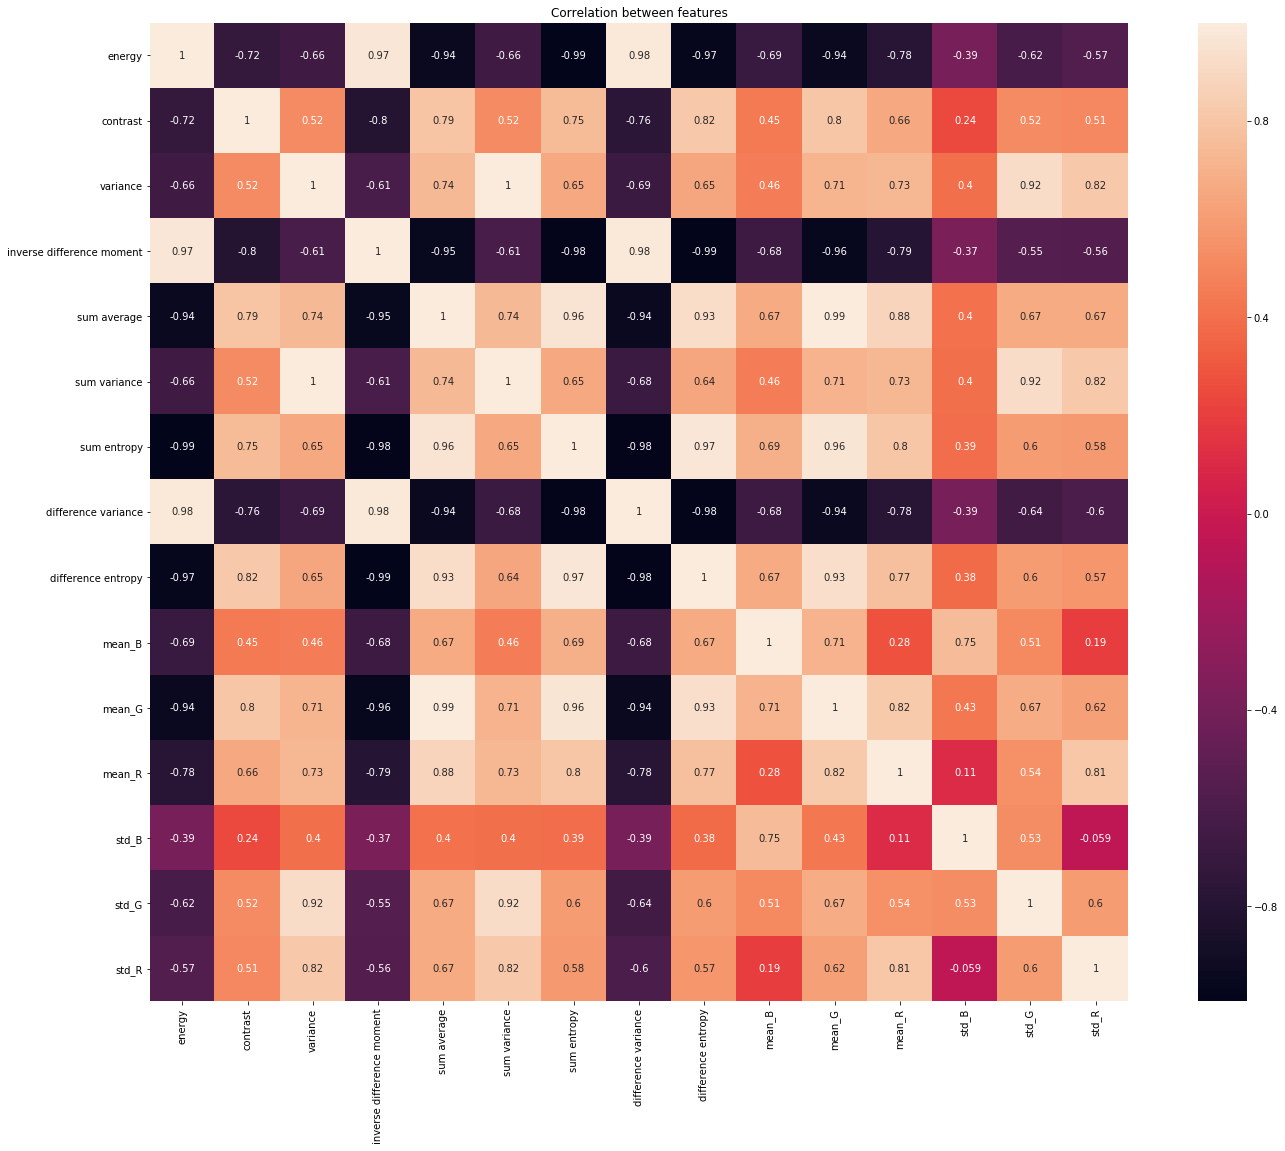

In [98]:
plt.figure(figsize=(25, 18))
corr = train_data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, square=True,annot=True,linecolor="black") #cmap='YlGnBu',
plt.title("Correlation between features")

In [99]:
train_data = train_data.drop('sum variance', 1)

### Statistical Analysis of Test dataset

In [100]:
test = pd.read_csv('test.csv')

In [101]:
test.head()

,energy,contrast,correlation,variance,inverse difference moment,sum average,sum variance,sum entropy,entropy,difference variance,...,maximal_corr_coeff,mean_B,mean_G,mean_R,std_B,std_G,std_R,area,perimeter,label
0,0.027614,75.876049,0.989063,3470.442224,0.374566,188.172519,13805.892846,7.185458,10.225069,0.000508,...,0.995927,110.672779,120.317806,35.355999,70.883012,76.101307,31.148942,2.0,5.656854,1.0
1,0.608491,69.903593,0.985977,2491.946158,0.861429,45.117940,9897.881040,2.470234,3.084804,0.002641,...,0.966300,21.281883,31.361919,5.540855,48.681124,68.800080,20.708447,0.0,6.000000,0.0
2,0.774782,40.664489,0.990493,2138.230310,0.931399,29.151960,8512.256752,1.404731,1.691952,0.003352,...,0.894826,2.985298,17.295013,13.519966,15.772796,54.802283,43.304531,2.0,5.656854,0.0
3,0.512548,66.226205,0.990938,3653.219553,0.805368,63.610339,14546.652007,3.228891,4.136742,0.002263,...,0.981659,10.598244,37.527039,28.357140,32.558882,69.544082,56.139926,0.0,0.000000,0.0
4,0.681286,43.313882,0.987096,1677.881036,0.883863,31.407314,6668.210263,2.031875,2.552463,0.002906,...,0.943898,16.325077,21.885483,3.178383,43.928372,57.206220,13.287565,2.0,5.656854,0.0


#### Seperating the labels

In [102]:
test_data = test.iloc[:,:-1]
test_label = test.iloc[:,-1]
test_label = test_label.astype(int)

Text(0.5,1,'Correlation between features')

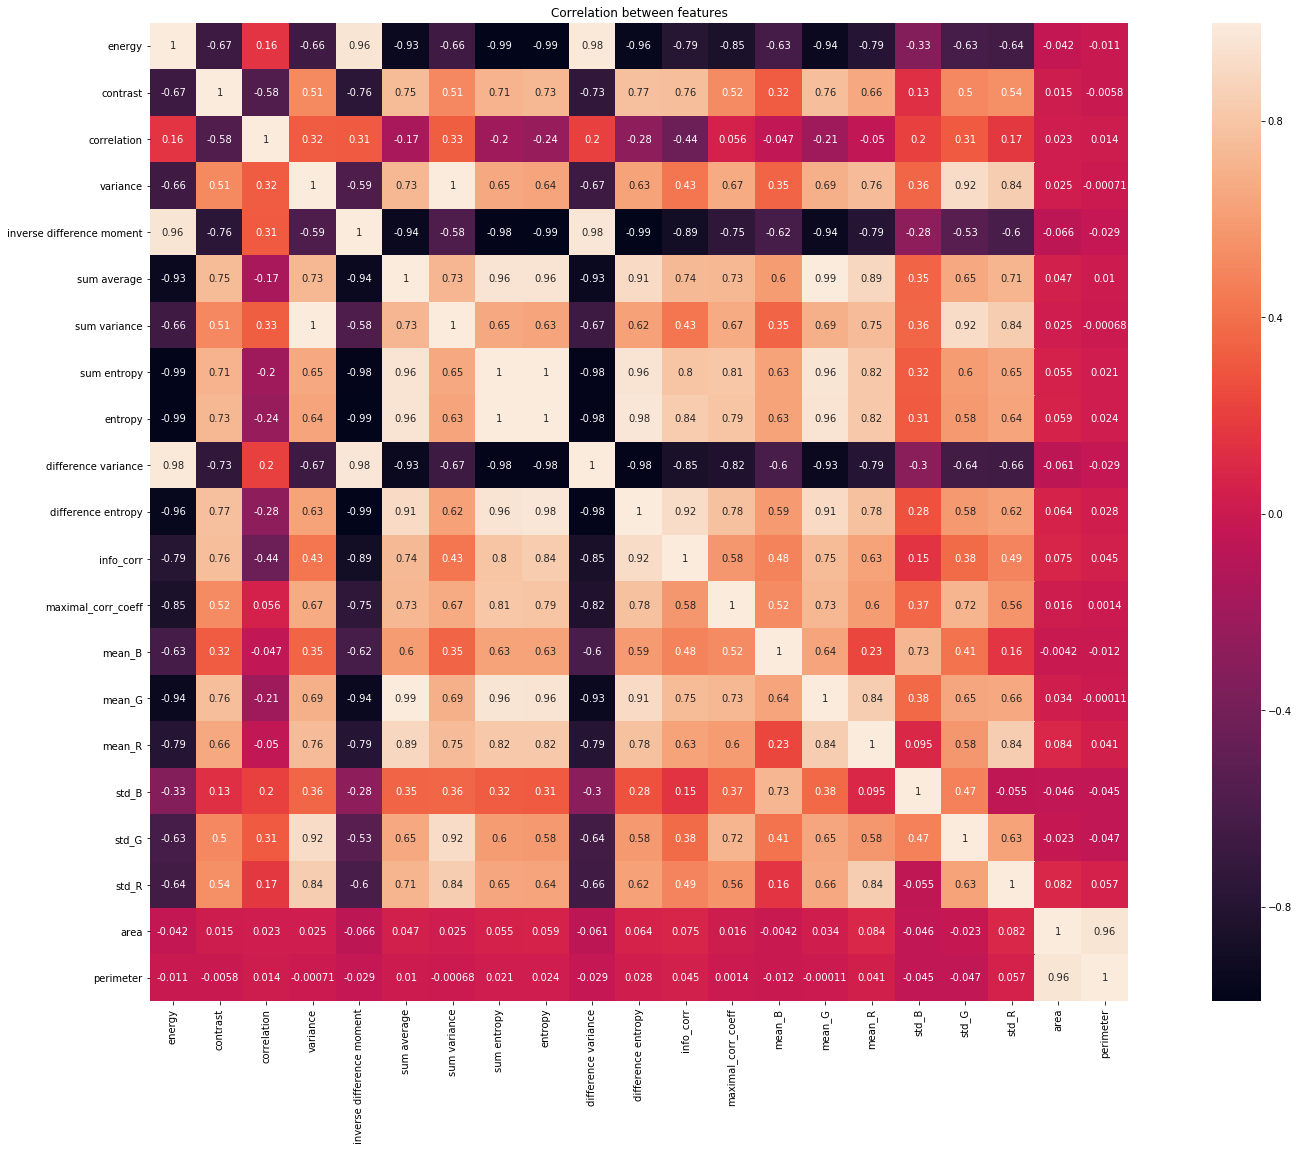

In [103]:
plt.figure(figsize=(30,18))
corr = test_data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, square=True,annot=True,linecolor="black") #cmap='YlGnBu',
plt.title("Correlation between features")

In [104]:
test_label.describe()

count    336.000000
mean       0.217262
std        0.671687
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: label, dtype: float64

In [105]:
test_data['energy'].describe()

count    336.000000
mean       0.381219
std        0.283994
min        0.004658
25%        0.094548
50%        0.329738
75%        0.645981
max        0.845630
Name: energy, dtype: float64

In [106]:
test_data['energy'] = (test_data['energy'] - test_data['energy'].min())/(test_data['energy'].max() - test_data['energy'].min()) 

/home/ln-2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [107]:
test_data['energy'].describe()

count    336.000000
mean       0.447769
std        0.337697
min        0.000000
25%        0.106888
50%        0.386553
75%        0.762597
max        1.000000
Name: energy, dtype: float64

In [108]:
test_data['contrast'].describe()

count    336.000000
mean      69.561838
std       38.245206
min       17.425366
25%       40.412398
50%       64.899196
75%       89.125763
max      204.489528
Name: contrast, dtype: float64

In [109]:
test_data['contrast'] = (test_data['contrast'] - test_data['contrast'].min())/(test_data['contrast'].max() - test_data['contrast'].min())

/home/ln-2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [110]:
train_data['contrast'].describe()

count    1680.000000
mean        0.252931
std         0.197644
min         0.000000
25%         0.109204
50%         0.187780
75%         0.325711
max         1.000000
Name: contrast, dtype: float64

In [111]:
test_data['correlation'].describe()

count    336.000000
mean       0.990533
std        0.004059
min        0.975925
25%        0.988728
50%        0.990947
75%        0.993186
max        0.998248
Name: correlation, dtype: float64

In [112]:
test_data = test_data.drop('correlation', 1)

In [113]:
test_data['variance'].describe()

count      336.000000
mean      3909.610298
std       1712.638597
min        723.917281
25%       2586.573185
50%       3621.877886
75%       5046.901349
max      10235.974329
Name: variance, dtype: float64

In [114]:
test_data['variance'] = (test_data['variance'] - test_data['variance'].min())/(test_data['variance'].max() - test_data['variance'].min())

In [115]:
test_data['variance'].describe()

count    336.000000
mean       0.334911
std        0.180049
min        0.000000
25%        0.195821
50%        0.304662
75%        0.454474
max        1.000000
Name: variance, dtype: float64

In [116]:
test_data['inverse difference moment'].describe()

count    336.000000
mean       0.708510
std        0.183220
min        0.301643
25%        0.555854
50%        0.707041
75%        0.875487
max        0.943683
Name: inverse difference moment, dtype: float64

In [117]:
test_data['inverse difference moment'] = (test_data['inverse difference moment'] - test_data['inverse difference moment'].min())/(test_data['inverse difference moment'].max() - test_data['inverse difference moment'].min())

In [118]:
test_data['inverse difference moment'].describe()

count    336.000000
mean       0.633710
std        0.285371
min        0.000000
25%        0.395944
50%        0.631422
75%        0.893783
max        1.000000
Name: inverse difference moment, dtype: float64

In [119]:
test_data['sum average'].describe()

count    336.000000
mean     111.103021
std       76.046614
min       16.737848
25%       43.332638
50%       93.651646
75%      176.030230
max      286.639565
Name: sum average, dtype: float64

In [120]:
test_data['sum average'] = (test_data['sum average'] - test_data['sum average'].min())/(test_data['sum average'].max() - test_data['sum average'].min())

In [121]:
test_data['sum average'].describe()

count    336.000000
mean       0.349628
std        0.281757
min        0.000000
25%        0.098535
50%        0.284970
75%        0.590187
max        1.000000
Name: sum average, dtype: float64

In [122]:
test_data['sum variance'].describe()

count      336.000000
mean     15568.879356
std       6831.024082
min       2875.938816
25%      10281.756637
50%      14428.053009
75%      20113.582200
max      40836.873379
Name: sum variance, dtype: float64

In [123]:
test_data['sum variance'] = (test_data['sum variance'] - test_data['sum variance'].min())/(test_data['sum variance'].max() - test_data['sum variance'].min())

In [124]:
test_data['sum variance'].describe()

count    336.000000
mean       0.334368
std        0.179949
min        0.000000
25%        0.195091
50%        0.304316
75%        0.454089
max        1.000000
Name: sum variance, dtype: float64

In [125]:
test_data['sum entropy'].describe()

count    336.000000
mean       4.301662
std        2.219880
min        1.044182
25%        2.225129
50%        4.344006
75%        6.430868
max        8.082018
Name: sum entropy, dtype: float64

In [126]:
test_data['sum entropy'] = (test_data['sum entropy'] - test_data['sum entropy'].min())/(test_data['sum entropy'].max() - test_data['sum entropy'].min())

In [127]:
test_data['sum entropy'].describe()

count    336.000000
mean       0.462853
std        0.315421
min        0.000000
25%        0.167800
50%        0.468869
75%        0.765390
max        1.000000
Name: sum entropy, dtype: float64

In [128]:
test_data = test_data.drop('entropy', 1)

In [129]:
test_data['difference variance'].describe()

count    336.000000
mean       0.001940
std        0.000997
min        0.000363
25%        0.001052
50%        0.001818
75%        0.002810
max        0.003909
Name: difference variance, dtype: float64

In [130]:
test_data['difference variance'] = (test_data['difference variance'] - test_data['difference variance'].min())/(test_data['difference variance'].max() - test_data['difference variance'].min())

In [131]:
test_data['difference variance'].describe()

count    336.000000
mean       0.444836
std        0.281149
min        0.000000
25%        0.194352
50%        0.410497
75%        0.690182
max        1.000000
Name: difference variance, dtype: float64

In [132]:
test_data['difference entropy'] = (test_data['difference entropy'] - test_data['difference entropy'].min())/(test_data['difference entropy'].max() - test_data['difference entropy'].min())

In [133]:
test_data['difference entropy'].describe()

count    336.000000
mean       0.398770
std        0.268640
min        0.000000
25%        0.154495
50%        0.436781
75%        0.599415
max        1.000000
Name: difference entropy, dtype: float64

In [134]:
test_data['info_corr'].describe()

count    336.000000
mean      -0.555872
std        0.070983
min       -0.673205
25%       -0.611734
50%       -0.578319
75%       -0.515419
max       -0.372519
Name: info_corr, dtype: float64

In [135]:
test_data = test_data.drop('info_corr', 1)

In [136]:
test_data['maximal_corr_coeff'].describe()

count    336.000000
mean       0.970416
std        0.037391
min        0.831003
25%        0.953873
50%        0.988087
75%        0.997962
max        0.999605
Name: maximal_corr_coeff, dtype: float64

In [137]:
test_data = test_data.drop('maximal_corr_coeff', 1)

In [138]:
test_data['mean_B'].describe()

count    336.000000
mean      32.809371
std       26.814532
min        0.970089
25%       14.797096
50%       24.274105
75%       45.680485
max      112.185452
Name: mean_B, dtype: float64

In [139]:
test_data['mean_B'] = (test_data['mean_B'] - test_data['mean_B'].min())/(test_data['mean_B'].max() - test_data['mean_B'].min())

In [140]:
test_data['mean_B'].describe()

count    336.000000
mean       0.286285
std        0.241105
min        0.000000
25%        0.124326
50%        0.209540
75%        0.402016
max        1.000000
Name: mean_B, dtype: float64

In [141]:
test_data['mean_G'].describe()

count    336.000000
mean      68.797543
std       45.885266
min       11.152794
25%       28.710372
50%       57.870653
75%      105.815880
max      168.683632
Name: mean_G, dtype: float64

In [142]:
test_data['mean_G'] = (test_data['mean_G'] - test_data['mean_G'].min())/(test_data['mean_G'].max() - test_data['mean_G'].min())

In [143]:
test_data['mean_G'].describe()

count    336.000000
mean       0.365927
std        0.291278
min        0.000000
25%        0.111455
50%        0.296563
75%        0.600918
max        1.000000
Name: mean_G, dtype: float64

In [144]:
test_data['mean_R'].describe()

count    336.000000
mean      37.726338
std       34.984559
min        0.971321
25%        8.494502
50%       23.550409
75%       58.376456
max      130.822586
Name: mean_R, dtype: float64

In [145]:
test_data['mean_R'] = (test_data['mean_R'] - test_data['mean_R'].min())/(test_data['mean_R'].max() - test_data['mean_R'].min())

In [146]:
test_data['mean_R'].describe()

count    336.000000
mean       0.283055
std        0.269420
min        0.000000
25%        0.057937
50%        0.173884
75%        0.442084
max        1.000000
Name: mean_R, dtype: float64

In [147]:
test_data['std_B'].describe()

count    336.000000
mean      48.539821
std       18.575027
min        6.345672
25%       34.788118
50%       49.414359
75%       62.698997
max       91.830830
Name: std_B, dtype: float64

In [148]:
test_data['std_B'] = (test_data['std_B'] - test_data['std_B'].min())/(test_data['std_B'].max() - test_data['std_B'].min())

In [149]:
test_data['std_B'].describe()

count    336.000000
mean       0.493585
std        0.217290
min        0.000000
25%        0.332718
50%        0.503815
75%        0.659218
max        1.000000
Name: std_B, dtype: float64

In [150]:
test_data['std_G'].describe()

count    336.000000
mean      74.964460
std       14.119544
min       29.865709
25%       66.440077
50%       74.432999
75%       85.383841
max      117.548606
Name: std_G, dtype: float64

In [151]:
test_data['std_G'] = (test_data['std_G'] - test_data['std_G'].min())/(test_data['std_G'].max() - test_data['std_G'].min())

In [152]:
test_data['std_G'].describe()

count    336.000000
mean       0.514339
std        0.161030
min        0.000000
25%        0.417121
50%        0.508278
75%        0.633169
max        1.000000
Name: std_G, dtype: float64

In [153]:
test_data['std_R'].describe()

count    336.000000
mean      45.471404
std       22.075983
min        6.020718
25%       26.171608
50%       47.308589
75%       62.776349
max       99.453379
Name: std_R, dtype: float64

In [154]:
test_data['std_R'] = (test_data['std_R'] - test_data['std_R'].min())/(test_data['std_R'].max() - test_data['std_R'].min())

In [155]:
test_data['std_R'].describe()

count    336.000000
mean       0.422237
std        0.236277
min        0.000000
25%        0.215673
50%        0.441900
75%        0.607450
max        1.000000
Name: std_R, dtype: float64

In [156]:
test_data['area'].describe()

count    336.000000
mean      12.617560
std       56.056171
min        0.000000
25%        0.000000
50%        2.000000
75%        4.000000
max      695.000000
Name: area, dtype: float64

In [157]:
test_data = test_data.drop('area', 1)


In [158]:
test_data['perimeter'].describe()

count    336.000000
mean      11.084776
std       28.121907
min        0.000000
25%        2.000000
50%        5.656854
75%        9.071068
max      321.989894
Name: perimeter, dtype: float64

In [159]:
test_data = test_data.drop('perimeter', 1)

In [160]:
test_data.head()

,energy,contrast,variance,inverse difference moment,sum average,sum variance,sum entropy,difference variance,difference entropy,mean_B,mean_G,mean_R,std_B,std_G,std_R
0,0.027297,0.312463,0.288741,0.113581,0.635174,0.287926,0.872609,0.041073,0.881784,0.986399,0.692976,0.264800,0.754954,0.527305,0.268945
1,0.718017,0.280536,0.185872,0.871887,0.105150,0.184978,0.202626,0.642394,0.184519,0.182635,0.128287,0.035191,0.495237,0.444036,0.157201
2,0.915754,0.124231,0.148686,0.980867,0.045995,0.148477,0.051230,0.842909,0.029530,0.018120,0.038991,0.096639,0.110278,0.284395,0.399045
3,0.603932,0.260878,0.307957,0.784570,0.173665,0.307440,0.310423,0.535891,0.301134,0.086572,0.167423,0.210901,0.306640,0.452521,0.536421
4,0.804578,0.138394,0.100290,0.906829,0.054351,0.099899,0.140340,0.717357,0.139036,0.138065,0.068131,0.016997,0.439640,0.311811,0.077776


In [161]:
test_label.head()

0    1
1    0
2    0
3    0
4    0
Name: label, dtype: int64

Text(0.5,1,'Correlation between features')

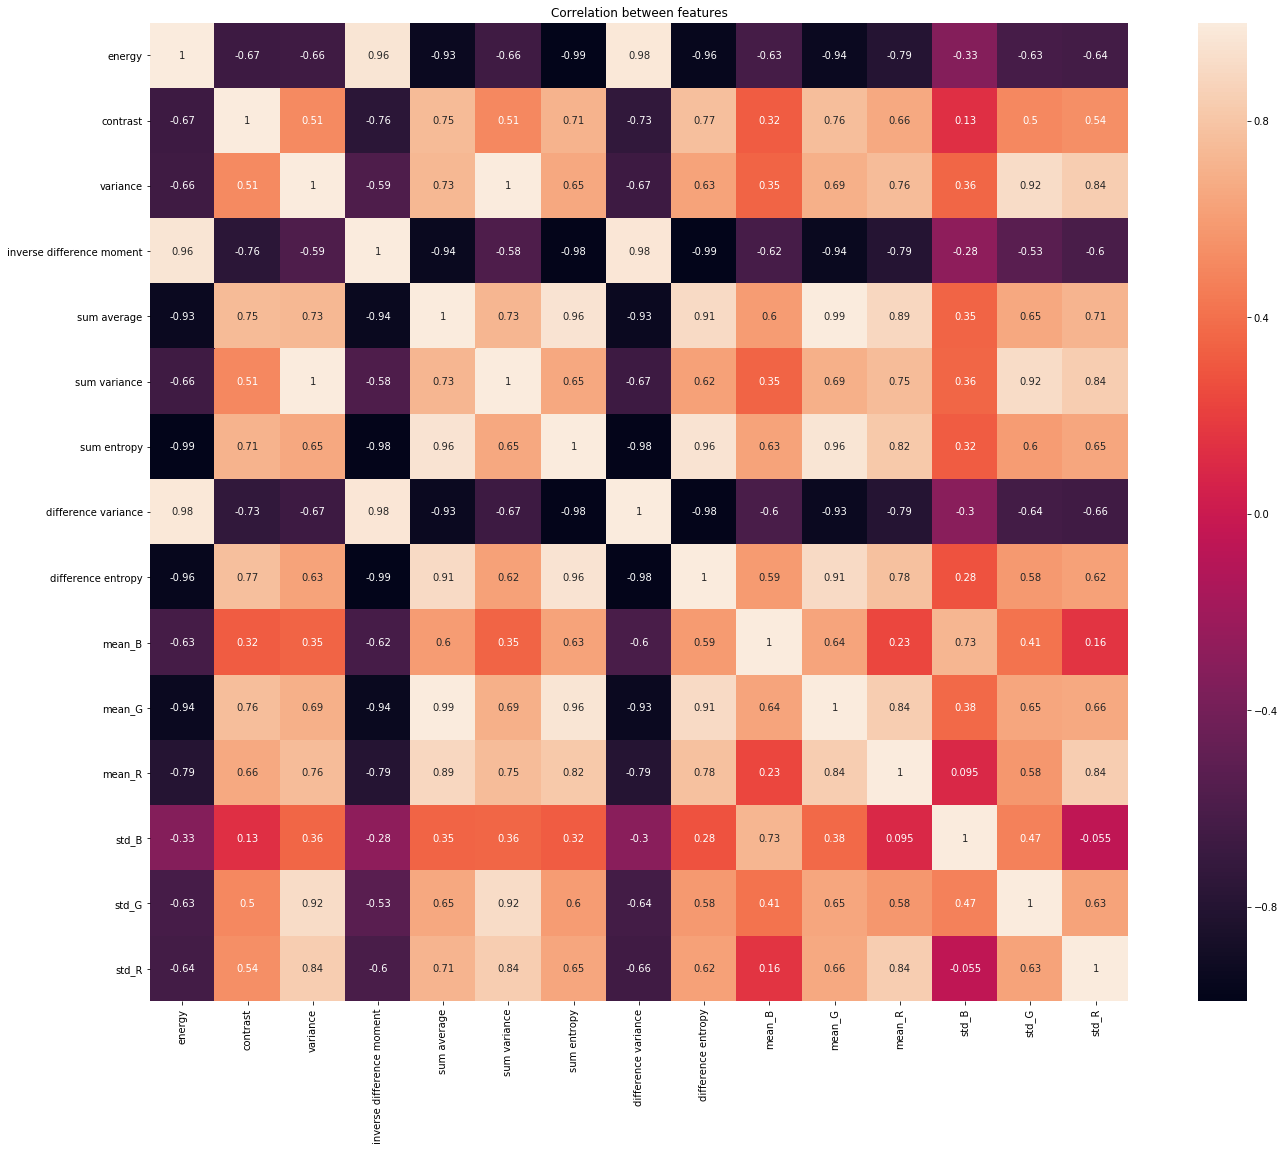

In [162]:
plt.figure(figsize=(25, 18))
corr = test_data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, square=True,annot=True,linecolor="black") #cmap='YlGnBu',
plt.title("Correlation between features")

In [163]:
test_data = test_data.drop('sum variance', 1)

In [164]:
print(min_element)
print()
print(max_element)
print()

[0.004525411587781038, 15.572683744138258, 723.7659687624123, 0.29563610986758765, 16.738054799965816, 2875.0273282599305, 1.065154061486279, 1.3196773181737191, 0.0003536323684910665, 0.6390858602226379, 0.906940460205078, 11.157840728759766, 0.9714202880859376, 5.822115522862383, 29.857774066962445, 6.020602737364478]

[0.8420960235961523, 216.3760983537236, 10236.008786698658, 0.9430541073896348, 286.6398314824294, 40837.009914020826, 8.09825611003825, 11.603656601868789, 0.003915111090246931, 4.178118936907058, 130.7896957397461, 168.6835670471191, 130.8224105834961, 99.4731501591503, 117.60844643014582, 99.45398816774765]



### Next Step is the model Selection

#### Training 

#### Evaluation

#### Hyperparameter Tuning



####  Support Vector machine works well for multiclass classification.

In [165]:
from sklearn import svm
from sklearn.metrics import accuracy_score

#### SVC model 

In [166]:
model = svm.SVC()

## Training of dataset

In [167]:
model.fit(train_data,train_label)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Testing of the trained model

In [168]:
predict_label = model.predict(test_data)

### Evaluation of the trained model 

In [169]:
accuracy = accuracy_score(test_label,predict_label)

In [170]:
print('Accuracy of the model is {:.2f}'.format(accuracy*100))

Accuracy of the model is 88.10



## Hyper-Parameter Tuning

#### Regularization parameter C - high C value implies strict classification.

#### Gamma parameter - high gamma parameter value implies only nearby points (support vector) are considered for classification.

#### Kernel - Radial Basis Kernel(rbf) , linear kernel are popular choices.

In [171]:
model = svm.SVC(kernel = 'linear')

In [172]:
model.fit(train_data,train_label)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [173]:
predict_label = model.predict(test_data)

In [174]:
accuracy = accuracy_score(test_label,predict_label)

In [175]:
print('Accuracy of the model is {:.2f}'.format(accuracy*100))

Accuracy of the model is 92.86


### Case 2

In [176]:
model = svm.SVC(kernel = 'linear',C=10,gamma = 1)

In [177]:
model.fit(train_data,train_label)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [178]:
predict_label = model.predict(test_data)

In [179]:
accuracy = accuracy_score(test_label,predict_label)

In [180]:
print('Accuracy of the model is {:.2f}'.format(accuracy*100))

Accuracy of the model is 97.32


### Case 3

In [181]:
model = svm.SVC(kernel = 'linear',C=10,gamma = 2)

In [182]:
model.fit(train_data,train_label)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=2, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [183]:
predict_label = model.predict(test_data)

In [184]:
accuracy = accuracy_score(test_label,predict_label)

In [185]:
print('Accuracy of the model is {:.2f}'.format(accuracy*100))

Accuracy of the model is 97.32


### Case 4

In [186]:
model = svm.SVC(kernel = 'linear',C=10,gamma = 0.02)

In [187]:
model.fit(train_data,train_label)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.02, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [188]:
predict_label = model.predict(test_data)

In [189]:
accuracy = accuracy_score(test_label,predict_label)

In [190]:
print('Accuracy of the model is {:.2f}'.format(accuracy*100))

Accuracy of the model is 97.32


#### Case 5

In [191]:
model = svm.SVC(kernel = 'linear',C=100)

In [192]:
model.fit(train_data,train_label)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [193]:
predict_label = model.predict(test_data)

In [194]:
accuracy = accuracy_score(test_label,predict_label)

In [195]:
print('Accuracy of the model is {:.2f}'.format(accuracy*100))

Accuracy of the model is 97.02


### Case 6

In [196]:
model = svm.SVC(kernel = 'rbf',C=10,gamma=1)

In [197]:
model.fit(train_data,train_label)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [198]:
predict_label = model.predict(test_data)

In [199]:
accuracy = accuracy_score(test_label,predict_label)

In [200]:
print('Accuracy of the model is {:.2f}'.format(accuracy*100))

Accuracy of the model is 96.13


### Case 7

In [201]:
model = svm.SVC(kernel = 'rbf',C=100,gamma=1)

In [202]:
model.fit(train_data,train_label)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [203]:
predict_label = model.predict(test_data)

In [204]:
accuracy = accuracy_score(test_label,predict_label)

In [205]:
print('Accuracy of the model is {:.2f}'.format(accuracy*100))

Accuracy of the model is 96.13


## Case 8

In [206]:
model = svm.SVC(kernel = 'rbf',C=100,gamma=2)

In [207]:
model.fit(train_data,train_label)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=2, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [208]:
predict_label = model.predict(test_data)

In [209]:
accuracy = accuracy_score(test_label,predict_label)

In [210]:
print('Accuracy of the model is {:.2f}'.format(accuracy*100))

Accuracy of the model is 96.43


## Case 9

In [211]:
model = svm.SVC(kernel = 'rbf',C=100,gamma=0.01)

In [212]:
model.fit(train_data,train_label)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [213]:
predict_label = model.predict(test_data)

In [214]:
accuracy = accuracy_score(test_label,predict_label)

In [215]:
print('Accuracy of the model is {:.2f}'.format(accuracy*100))

Accuracy of the model is 92.86


### Case 10

In [216]:
model = svm.SVC(kernel = 'rbf',C=1,gamma=0.01)

In [217]:
model.fit(train_data,train_label)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [218]:
predict_label = model.predict(test_data)

In [219]:
accuracy = accuracy_score(test_label,predict_label)

In [220]:
print('Accuracy of the model is {:.2f}'.format(accuracy*100))

Accuracy of the model is 88.10


### Case 11

In [221]:
model = svm.SVC(kernel = 'rbf', C=0.0001)

In [222]:
model.fit(train_data,train_label)

SVC(C=0.0001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [223]:
predict_label = model.predict(test_data)

In [224]:
accuracy = accuracy_score(test_label,predict_label)

In [225]:
model.score(test_data,test_label)

0.8809523809523809

In [226]:
print('Accuracy of the model is {:.2f}'.format(accuracy*100))

Accuracy of the model is 88.10


## Decision Tree Classifier

#### case 1

In [227]:
from sklearn import tree

In [228]:
model = tree.DecisionTreeClassifier()

In [229]:
model.fit(train_data,train_label)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [230]:
predict_label = model.predict(test_data)

In [231]:
accuracy = accuracy_score(test_label,predict_label)

In [232]:
print('Accuracy of the model is {:.2f}'.format(accuracy*100))

Accuracy of the model is 94.05


#### case 2

In [233]:
model = tree.DecisionTreeClassifier(criterion = 'entropy')

In [234]:
model.fit(train_data,train_label)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [235]:
predict_label = model.predict(test_data)

In [236]:
accuracy = accuracy_score(test_label,predict_label)

In [237]:
print('Accuracy of the model is {:.2f}'.format(accuracy*100))

Accuracy of the model is 96.43



#### case 3

In [238]:
model = tree.DecisionTreeClassifier(min_samples_split = 2)

In [239]:
model.fit(train_data,train_label)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [240]:
predict_label = model.predict(test_data)

In [241]:
accuracy = accuracy_score(test_label,predict_label)

In [242]:
print('Accuracy of the model is {:.2f}'.format(accuracy*100))

Accuracy of the model is 92.86


#### case 4

In [243]:
model = tree.DecisionTreeClassifier(criterion = 'entropy', min_samples_split = 79)

In [244]:
model.fit(train_data,train_label)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=79,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [245]:
predict_label = model.predict(test_data)

In [246]:
accuracy = accuracy_score(test_label,predict_label)

In [247]:
print('Accuracy of the model is {:.2f}'.format(accuracy*100))

Accuracy of the model is 94.05


## K-NN Classifier

#### case 1

In [248]:
from sklearn.neighbors import KNeighborsClassifier

In [249]:
model = KNeighborsClassifier(n_neighbors = 3) 

In [250]:
model.fit(train_data,train_label)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [251]:
predict_label = model.predict(test_data)

In [252]:
accuracy = accuracy_score(test_label,predict_label)

In [253]:
print('Accuracy of the model is {:.2f}'.format(accuracy*100))

Accuracy of the model is 96.43


#### case 2

In [254]:
model = KNeighborsClassifier() 

In [255]:
model.fit(train_data,train_label)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [256]:
predict_label = model.predict(test_data)

In [257]:
accuracy = accuracy_score(test_label,predict_label)

In [258]:
print('Accuracy of the model is {:.2f}'.format(accuracy*100))

Accuracy of the model is 94.64


#### case 3

In [259]:
model = KNeighborsClassifier(n_neighbors = 5,algorithm = 'kd_tree') 

In [260]:
model.fit(train_data,train_label)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [261]:
predict_label = model.predict(test_data)

In [262]:
accuracy = accuracy_score(test_label,predict_label)

In [263]:
print('Accuracy of the model is {:.2f}'.format(accuracy*100))

Accuracy of the model is 94.64


#### case 4

In [264]:
model = KNeighborsClassifier(n_neighbors = 5,algorithm = 'ball_tree')

In [265]:
model.fit(train_data,train_label)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [266]:
predict_label = model.predict(test_data)

In [267]:
accuracy = accuracy_score(test_label,predict_label)

In [268]:
print('Accuracy of the model is {:.2f}'.format(accuracy*100))

Accuracy of the model is 94.64


#### case 5

In [269]:
model = KNeighborsClassifier(n_neighbors = 6,algorithm = 'brute')

In [270]:
model.fit(train_data,train_label)

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [271]:
predict_label = model.predict(test_data)

In [272]:
accuracy = accuracy_score(test_label,predict_label)

In [273]:
print('Accuracy of the model is {:.2f}'.format(accuracy*100))

Accuracy of the model is 94.35


### Random Forest Classifier

#### case 1

In [274]:
from sklearn.ensemble import RandomForestClassifier

/home/ln-2/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [275]:
model = RandomForestClassifier()

In [276]:
model.fit(train_data,train_label)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [277]:
predict_label = model.predict(test_data)

In [278]:
accuracy = accuracy_score(test_label,predict_label)

In [279]:
print('Accuracy of the model is {:.2f}'.format(accuracy*100))

Accuracy of the model is 96.43


#### case 2

In [280]:
model = RandomForestClassifier(n_estimators = 5)

In [281]:
model.fit(train_data,train_label)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [282]:
predict_label = model.predict(test_data)

In [283]:
accuracy = accuracy_score(test_label,predict_label)

In [284]:
print('Accuracy of the model is {:.2f}'.format(accuracy*100))

Accuracy of the model is 96.43


#### case 3

In [285]:
model = RandomForestClassifier(n_estimators = 70)

In [286]:
model.fit(train_data,train_label)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=70, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [287]:
predict_label = model.predict(test_data)

In [288]:
accuracy = accuracy_score(test_label,predict_label)

In [289]:
print('Accuracy of the model is {:.2f}'.format(accuracy*100))

Accuracy of the model is 96.43


#### case 4

In [290]:
model = RandomForestClassifier(criterion = 'entropy')

In [291]:
model.fit(train_data,train_label)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [292]:
predict_label = model.predict(test_data)

In [293]:
accuracy = accuracy_score(test_label,predict_label)

In [294]:
print('Accuracy of the model is {:.2f}'.format(accuracy*100))

Accuracy of the model is 98.81


#### case 5

In [295]:
model = RandomForestClassifier(n_estimators = 30, criterion = 'entropy')

In [296]:
model.fit(train_data,train_label)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [297]:
predict_label = model.predict(test_data)

In [298]:
accuracy = accuracy_score(test_label,predict_label)

In [299]:
print('Accuracy of the model is {:.2f}'.format(accuracy*100))

Accuracy of the model is 96.43


#### case 6

In [300]:
model = RandomForestClassifier(n_estimators = 100,criterion = 'entropy')

In [301]:
model.fit(train_data,train_label)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [302]:
predict_label = model.predict(test_data)

In [303]:
accuracy = accuracy_score(test_label,predict_label)

In [304]:
print('Accuracy of the model is {:.2f}'.format(accuracy*100))

Accuracy of the model is 96.43


### AdaBoost Classifier

#### case 1

In [305]:
from sklearn.ensemble import AdaBoostClassifier

In [306]:
dtree = tree.DecisionTreeClassifier(criterion = 'gini', max_depth = 1)
adabst = AdaBoostClassifier(base_estimator = dtree, n_estimators = 5000, learning_rate = 0.05, random_state = 42)

In [307]:
adabst.fit(train_data,train_label)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.05, n_estimators=5000, random_state=42)

In [308]:
predict_label = adabst.predict(test_data)

In [309]:
accuracy = accuracy_score(test_label,predict_label)

In [310]:
print('Accuracy of the model is {:.2f}'.format(accuracy*100))

Accuracy of the model is 69.35


### case 2

In [311]:
dtree = tree.DecisionTreeClassifier(criterion = 'gini')
adabst = AdaBoostClassifier(base_estimator = dtree, n_estimators = 5000, learning_rate = 0.05, random_state = 42)

In [312]:
adabst.fit(train_data,train_label)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.05, n_estimators=5000, random_state=42)

In [313]:
predict_label = adabst.predict(test_data)

In [314]:
accuracy = accuracy_score(test_label,predict_label)

In [315]:
print('Accuracy of the model is {:.2f}'.format(accuracy*100))

Accuracy of the model is 90.18


#### case 3

In [316]:
dtree = tree.DecisionTreeClassifier(min_samples_split = 10)
adabst = AdaBoostClassifier(base_estimator = dtree, n_estimators = 1000, learning_rate = 0.05, random_state = 42)

In [317]:
adabst.fit(train_data,train_label)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.05, n_estimators=1000, random_state=42)

In [318]:
predict_label = adabst.predict(test_data)

In [319]:
accuracy = accuracy_score(test_label,predict_label)

In [320]:
print('Accuracy of the model is {:.2f}'.format(accuracy*100))

Accuracy of the model is 94.64


#### case 4

In [321]:
dtree = tree.DecisionTreeClassifier(min_samples_split = 10)
adabst = AdaBoostClassifier(base_estimator = dtree, n_estimators = 5000, learning_rate = 0.01, random_state = 42)

In [322]:
adabst.fit(train_data,train_label)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.01, n_estimators=5000, random_state=42)

In [323]:
predict_label = adabst.predict(test_data)

In [324]:
accuracy = accuracy_score(test_label,predict_label)

In [325]:
print('Accuracy of the model is {:.2f}'.format(accuracy*100))

Accuracy of the model is 92.26


#### case 5

In [326]:
dtree = tree.DecisionTreeClassifier(min_samples_split = 10)
adabst = AdaBoostClassifier(base_estimator = dtree, n_estimators = 5000, learning_rate = 0.005, random_state = 42)

In [327]:
adabst.fit(train_data,train_label)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.005, n_estimators=5000, random_state=42)

In [328]:
predict_label = adabst.predict(test_data)

In [329]:
accuracy = accuracy_score(test_label,predict_label)

In [330]:
print('Accuracy of the model is {:.2f}'.format(accuracy*100))

Accuracy of the model is 92.26


### Cross-validation for model selection



In [331]:
models = [] 
value = [] 

#### K-fold Cross-validation for SVM classifier

In [332]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [333]:
clf = svm.SVC()

In [334]:
kernal = ['linear','rbf']
C = [0.001,0.01,0.1,1,10,100,1000]
gamma = [0.002,0.02,0.2,1,10,100,1000]

In [335]:
gride = dict(kernel = kernal,C = C, gamma = gamma)

In [336]:
grid_clf = GridSearchCV(clf, param_grid = gride, cv=5, scoring='accuracy', return_train_score=False, n_jobs=-1)

In [337]:
grid_clf.fit(train_data, train_label)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'kernel': ['linear', 'rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'gamma': [0.002, 0.02, 0.2, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring='accuracy', verbose=0)

In [338]:
pd.DataFrame(grid_clf.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.938095,0.002694,"{'C': 0.001, 'gamma': 0.002, 'kernel': 'linear'}"
1,0.938095,0.002694,"{'C': 0.001, 'gamma': 0.002, 'kernel': 'rbf'}"
2,0.938095,0.002694,"{'C': 0.001, 'gamma': 0.02, 'kernel': 'linear'}"
3,0.938095,0.002694,"{'C': 0.001, 'gamma': 0.02, 'kernel': 'rbf'}"
4,0.938095,0.002694,"{'C': 0.001, 'gamma': 0.2, 'kernel': 'linear'}"
5,0.938095,0.002694,"{'C': 0.001, 'gamma': 0.2, 'kernel': 'rbf'}"
6,0.938095,0.002694,"{'C': 0.001, 'gamma': 1, 'kernel': 'linear'}"
7,0.938095,0.002694,"{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}"
8,0.938095,0.002694,"{'C': 0.001, 'gamma': 10, 'kernel': 'linear'}"
9,0.938095,0.002694,"{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}"


In [339]:
print(grid_clf.cv_results_['params'][0])
print(grid_clf.cv_results_['mean_test_score'][0])

{'C': 0.001, 'gamma': 0.002, 'kernel': 'linear'}
0.9380952380952381


In [340]:
grid_mean_scores = grid_clf.cv_results_['mean_test_score']
print(grid_mean_scores)

[0.93809524 0.93809524 0.93809524 0.93809524 0.93809524 0.93809524
 0.93809524 0.93809524 0.93809524 0.93809524 0.93809524 0.93809524
 0.93809524 0.93809524 0.93809524 0.93809524 0.93809524 0.93809524
 0.93809524 0.93809524 0.93809524 0.93809524 0.93809524 0.93809524
 0.93809524 0.93809524 0.93809524 0.93809524 0.93809524 0.93809524
 0.93809524 0.93809524 0.93809524 0.93809524 0.93809524 0.93809524
 0.93809524 0.94345238 0.93809524 0.93809524 0.93809524 0.93809524
 0.97202381 0.93809524 0.97202381 0.93809524 0.97202381 0.95119048
 0.97202381 0.97678571 0.97202381 0.99404762 0.97202381 0.9952381
 0.97202381 0.99642857 0.98333333 0.93809524 0.98333333 0.95119048
 0.98333333 0.98214286 0.98333333 0.99285714 0.98333333 0.99583333
 0.98333333 0.99940476 0.98333333 0.99940476 0.99345238 0.95119048
 0.99345238 0.97857143 0.99345238 0.99345238 0.99345238 0.99583333
 0.99345238 1.         0.99345238 0.99940476 0.99345238 0.99940476
 0.99583333 0.97857143 0.99583333 0.9922619  0.99583333 0.99761

In [341]:
print(grid_clf.best_score_)
print(grid_clf.best_params_)
print(grid_clf.best_estimator_)

1.0
{'C': 100, 'gamma': 10, 'kernel': 'rbf'}
SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


#### K-fold Cross-validation for Decision Tree Classifier

In [342]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy')

In [343]:
criterion = ['entropy','gini']
min_samples_split = [2,3,4,5,6]

In [344]:
gride = dict(criterion = criterion, min_samples_split = min_samples_split)

In [345]:
grid_clf = GridSearchCV(clf, param_grid = gride, cv=5, scoring='accuracy', return_train_score=False, n_jobs=-1)

In [346]:
grid_clf.fit(train_data, train_label)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'criterion': ['entropy', 'gini'], 'min_samples_split': [2, 3, 4, 5, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring='accuracy', verbose=0)

In [347]:
pd.DataFrame(grid_clf.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.998214,0.003571,"{'criterion': 'entropy', 'min_samples_split': 2}"
1,0.998214,0.003571,"{'criterion': 'entropy', 'min_samples_split': 3}"
2,0.998214,0.003571,"{'criterion': 'entropy', 'min_samples_split': 4}"
3,0.998214,0.003571,"{'criterion': 'entropy', 'min_samples_split': 5}"
4,0.998214,0.003571,"{'criterion': 'entropy', 'min_samples_split': 6}"
5,1.000000,0.000000,"{'criterion': 'gini', 'min_samples_split': 2}"
6,1.000000,0.000000,"{'criterion': 'gini', 'min_samples_split': 3}"
7,1.000000,0.000000,"{'criterion': 'gini', 'min_samples_split': 4}"
8,0.999405,0.001190,"{'criterion': 'gini', 'min_samples_split': 5}"
9,0.999405,0.001190,"{'criterion': 'gini', 'min_samples_split': 6}"


In [348]:
print(grid_clf.cv_results_['params'][0])
print(grid_clf.cv_results_['mean_test_score'][0])

{'criterion': 'entropy', 'min_samples_split': 2}
0.9982142857142857


In [349]:
grid_mean_scores = grid_clf.cv_results_['mean_test_score']
print(grid_mean_scores)

[0.99821429 0.99821429 0.99821429 0.99821429 0.99821429 1.
 1.         1.         0.99940476 0.99940476]


In [350]:
print(grid_clf.best_score_)
print(grid_clf.best_params_)
print(grid_clf.best_estimator_)

1.0
{'criterion': 'gini', 'min_samples_split': 2}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


#### K-fold Cross-validation for Naive-Bayes Classifier

In [351]:
from sklearn.naive_bayes import GaussianNB

In [352]:
model = GaussianNB()

In [353]:
scores = cross_val_score(model,train_data,train_label,cv=5)

In [354]:
scores

array([0.91715976, 0.93452381, 0.91071429, 0.9375    , 0.94311377])

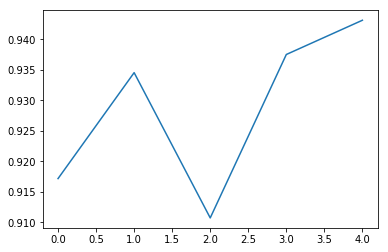

In [355]:
plt.plot(range(5),scores)

In [356]:
scores.mean()

0.928602326201359

#### k-fold Cross-validation for k-nearest neighbour classifier

In [357]:
clf = KNeighborsClassifier() 

In [358]:
k_range = list(range(1, 31))
weight_options = ['uniform', 'distance']

In [359]:
gride = dict(n_neighbors=k_range, weights=weight_options)

In [360]:
grid_clf = GridSearchCV(clf, param_grid = gride, cv=5, scoring='accuracy', return_train_score=False)

In [361]:
grid_clf.fit(train_data, train_label)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring='accuracy', verbose=0)

In [362]:
pd.DataFrame(grid_clf.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,1.000000,0.000000,"{'n_neighbors': 1, 'weights': 'uniform'}"
1,1.000000,0.000000,"{'n_neighbors': 1, 'weights': 'distance'}"
2,0.995833,0.004036,"{'n_neighbors': 2, 'weights': 'uniform'}"
3,1.000000,0.000000,"{'n_neighbors': 2, 'weights': 'distance'}"
4,0.995833,0.004036,"{'n_neighbors': 3, 'weights': 'uniform'}"
5,1.000000,0.000000,"{'n_neighbors': 3, 'weights': 'distance'}"
6,0.991667,0.005133,"{'n_neighbors': 4, 'weights': 'uniform'}"
7,1.000000,0.000000,"{'n_neighbors': 4, 'weights': 'distance'}"
8,0.988095,0.006260,"{'n_neighbors': 5, 'weights': 'uniform'}"
9,1.000000,0.000000,"{'n_neighbors': 5, 'weights': 'distance'}"


In [363]:
print(grid_clf.cv_results_['params'][0])
print(grid_clf.cv_results_['mean_test_score'][0])

{'n_neighbors': 1, 'weights': 'uniform'}
1.0


In [364]:
grid_mean_scores = grid_clf.cv_results_['mean_test_score']
print(grid_mean_scores)

[1.         1.         0.99583333 1.         0.99583333 1.
 0.99166667 1.         0.98809524 1.         0.9875     1.
 0.98571429 1.         0.98214286 1.         0.97916667 1.
 0.97321429 1.         0.96964286 1.         0.96666667 1.
 0.96428571 1.         0.96488095 1.         0.95892857 1.
 0.96071429 1.         0.95952381 1.         0.95595238 1.
 0.9547619  1.         0.95654762 1.         0.9577381  1.
 0.95833333 1.         0.95952381 1.         0.9577381  1.
 0.95714286 1.         0.95714286 1.         0.95654762 1.
 0.95357143 1.         0.95178571 1.         0.95119048 1.        ]


In [365]:
print(grid_clf.best_score_)
print(grid_clf.best_params_)
print(grid_clf.best_estimator_)

1.0
{'n_neighbors': 1, 'weights': 'uniform'}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')



#### K-fold Cross-validation for Random Forset Classifier 

In [366]:
clf = RandomForestClassifier()

In [367]:
n_estimators = [10,30,50,70,100]
criterion = ['gini','entropy']
min_samples_split = [2,3,4,5,6]

In [368]:
gride = dict(n_estimators = n_estimators, criterion = criterion, min_samples_split = min_samples_split)

In [369]:
grid_clf = GridSearchCV(clf, param_grid = gride, cv=5, scoring='accuracy', return_train_score=False, n_jobs=-1)

In [370]:
grid_clf.fit(train_data, train_label)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [10, 30, 50, 70, 100], 'criterion': ['gini', 'entropy'], 'min_samples_split': [2, 3, 4, 5, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring='accuracy', verbose=0)

In [371]:
pd.DataFrame(grid_clf.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,1.000000,0.000000,"{'criterion': 'gini', 'min_samples_split': 2, ..."
1,1.000000,0.000000,"{'criterion': 'gini', 'min_samples_split': 2, ..."
2,1.000000,0.000000,"{'criterion': 'gini', 'min_samples_split': 2, ..."
3,1.000000,0.000000,"{'criterion': 'gini', 'min_samples_split': 2, ..."
4,1.000000,0.000000,"{'criterion': 'gini', 'min_samples_split': 2, ..."
5,0.999405,0.001186,"{'criterion': 'gini', 'min_samples_split': 3, ..."
6,1.000000,0.000000,"{'criterion': 'gini', 'min_samples_split': 3, ..."
7,1.000000,0.000000,"{'criterion': 'gini', 'min_samples_split': 3, ..."
8,1.000000,0.000000,"{'criterion': 'gini', 'min_samples_split': 3, ..."
9,1.000000,0.000000,"{'criterion': 'gini', 'min_samples_split': 3, ..."


In [372]:
print(grid_clf.cv_results_['params'][0])
print(grid_clf.cv_results_['mean_test_score'][0])

{'criterion': 'gini', 'min_samples_split': 2, 'n_estimators': 10}
1.0


In [373]:
grid_mean_scores = grid_clf.cv_results_['mean_test_score']
print(grid_mean_scores)

[1.         1.         1.         1.         1.         0.99940476
 1.         1.         1.         1.         1.         1.
 0.99940476 1.         1.         0.99940476 1.         1.
 1.         1.         0.99702381 1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         0.99940476
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         0.99821429 1.         0.99761905
 1.         1.        ]


In [374]:
print(grid_clf.best_score_)
print(grid_clf.best_params_)
print(grid_clf.best_estimator_)

1.0
{'criterion': 'gini', 'min_samples_split': 2, 'n_estimators': 10}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


#### K-fold Cross-validation for AdaBoost Classifier 

In [375]:
dtree = tree.DecisionTreeClassifier()
clf = AdaBoostClassifier(base_estimator = dtree)

In [376]:
n_estimators = [10,100,1000,2000,3000,4000,5000]
learning_rate = [0.01,0.02,0.03,0.04,0.05]
random_state = [1,14,24,28,35,42]

In [377]:
gride = dict(n_estimators = n_estimators, learning_rate = learning_rate, random_state = random_state)

In [378]:
grid_clf = GridSearchCV(clf, param_grid = gride, cv=5, scoring='accuracy', return_train_score=False, n_jobs=-1)

In [379]:
grid_clf.fit(train_data, train_label)

GridSearchCV(cv=5, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [10, 100, 1000, 2000, 3000, 4000, 5000], 'learning_rate': [0.01, 0.02, 0.03, 0.04, 0.05], 'random_state': [1, 14, 24, 28, 35, 42]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring='accuracy', verbose=0)

In [380]:
pd.DataFrame(grid_clf.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.998810,0.001454,"{'learning_rate': 0.01, 'n_estimators': 10, 'r..."
1,0.999405,0.001186,"{'learning_rate': 0.01, 'n_estimators': 10, 'r..."
2,0.999405,0.001186,"{'learning_rate': 0.01, 'n_estimators': 10, 'r..."
3,0.999405,0.001190,"{'learning_rate': 0.01, 'n_estimators': 10, 'r..."
4,1.000000,0.000000,"{'learning_rate': 0.01, 'n_estimators': 10, 'r..."
5,1.000000,0.000000,"{'learning_rate': 0.01, 'n_estimators': 10, 'r..."
6,0.998810,0.001454,"{'learning_rate': 0.01, 'n_estimators': 100, '..."
7,0.999405,0.001186,"{'learning_rate': 0.01, 'n_estimators': 100, '..."
8,0.999405,0.001186,"{'learning_rate': 0.01, 'n_estimators': 100, '..."
9,0.999405,0.001190,"{'learning_rate': 0.01, 'n_estimators': 100, '..."


In [381]:
print(grid_clf.cv_results_['params'][0])
print(grid_clf.cv_results_['mean_test_score'][0])

{'learning_rate': 0.01, 'n_estimators': 10, 'random_state': 1}
0.9988095238095238


In [382]:
grid_mean_scores = grid_clf.cv_results_['mean_test_score']
print(grid_mean_scores)

[0.99880952 0.99940476 0.99940476 0.99940476 1.         1.
 0.99880952 0.99940476 0.99940476 0.99940476 1.         1.
 0.99880952 0.99940476 0.99940476 0.99940476 1.         1.
 0.99880952 0.99940476 0.99940476 0.99940476 1.         1.
 0.99880952 0.99940476 0.99940476 0.99940476 1.         1.
 0.99880952 0.99940476 0.99940476 0.99940476 1.         1.
 0.99880952 0.99940476 0.99940476 0.99940476 1.         1.
 0.99880952 0.99940476 0.99940476 0.99940476 1.         1.
 0.99880952 0.99940476 0.99940476 0.99940476 1.         1.
 0.99880952 0.99940476 0.99940476 0.99940476 1.         1.
 0.99880952 0.99940476 0.99940476 0.99940476 1.         1.
 0.99880952 0.99940476 0.99940476 0.99940476 1.         1.
 0.99880952 0.99940476 0.99940476 0.99940476 1.         1.
 0.99880952 0.99940476 0.99940476 0.99940476 1.         1.
 0.99880952 0.99940476 0.99940476 0.99940476 1.         1.
 0.99880952 0.99940476 0.99940476 0.99940476 1.         1.
 0.99880952 0.99940476 0.99940476 0.99940476 1.         

In [383]:
print(grid_clf.best_score_)
print(grid_clf.best_params_)
print(grid_clf.best_estimator_)

1.0
{'learning_rate': 0.01, 'n_estimators': 10, 'random_state': 35}
AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.01, n_estimators=10, random_state=35)


### Training And Testing

### Top 4 models are chosen by 5-fold cross-validation and that models are Support Vector Machine, Decision Tree, Random Forerst Classifier and Adaboost Classifier.

#### Support Vector Machine

In [386]:
model_svc = svm.SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [387]:
model_svc.fit(train_data,train_label)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

#### Decision Tree

In [388]:
model_dtree = tree.DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [389]:
model_dtree.fit(train_data,train_label)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

#### Random Forest Classifier

In [390]:
model_random = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [391]:
model_random.fit(train_data,train_label)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

#### AdaBoost Classifier

In [392]:
dtree = tree.DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

model_ada = AdaBoostClassifier(algorithm='SAMME.R',base_estimator= dtree, learning_rate=0.01, n_estimators=10, random_state=35)

In [393]:
model_ada.fit(train_data,train_label)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.01, n_estimators=10, random_state=35)

#### Prediction using SVM , Decision Tree, Random Forest Classifier and AdaBoost Classifier

In [394]:
pred_svc = model_svc.predict(test_data)

In [395]:
pred_dtree = model_dtree.predict(test_data)

In [396]:
pred_random = model_random.predict(test_data)

In [397]:
pred_ada = model_ada.predict(test_data)

### Final Ensemble prediction using Maximum Voting

In [398]:
final_pred = np.array([])

In [399]:
len(test_data)

336

In [424]:
for i in range(0,len(test_data)):
    final_pred = np.append(final_pred,stats.mode([pred_svc[i],pred_dtree[i],pred_random[i],pred_ada[i]]))

### Confusion Matrix

In [401]:
from sklearn.metrics import confusion_matrix

In [402]:
len(final_pred)

672

In [403]:
final_pred

array([1., 2., 0., 4., 0., 4., 0., 4., 0., 4., 0., 4., 0., 2., 3., 4., 3.,
       4., 0., 4., 0., 4., 0., 4., 0., 3., 0., 4., 0., 4., 0., 4., 0., 4.,
       3., 4., 0., 4., 0., 4., 0., 4., 0., 4., 0., 4., 0., 4., 0., 4., 0.,
       4., 0., 4., 0., 4., 2., 4., 0., 4., 0., 4., 0., 4., 0., 4., 0., 4.,
       0., 4., 0., 4., 0., 4., 0., 4., 0., 4., 0., 4., 0., 4., 0., 4., 0.,
       4., 0., 4., 0., 4., 0., 2., 0., 4., 0., 4., 0., 4., 0., 4., 0., 4.,
       0., 4., 0., 4., 1., 4., 0., 4., 0., 4., 0., 4., 0., 4., 0., 4., 0.,
       4., 0., 4., 0., 4., 0., 4., 2., 4., 0., 4., 0., 4., 1., 2., 0., 4.,
       0., 2., 0., 4., 0., 4., 0., 4., 0., 4., 0., 4., 0., 4., 0., 4., 0.,
       4., 3., 4., 0., 4., 0., 4., 0., 4., 0., 4., 1., 2., 0., 4., 2., 4.,
       0., 4., 0., 4., 0., 4., 0., 4., 0., 4., 0., 4., 0., 4., 1., 2., 0.,
       4., 0., 4., 0., 4., 0., 4., 0., 4., 0., 4., 0., 4., 0., 4., 0., 4.,
       0., 4., 0., 4., 0., 4., 0., 4., 0., 4., 0., 4., 0., 4., 0., 4., 0.,
       4., 0., 4., 0., 4.

In [404]:
prediction = final_pred.tolist()
prediction

[1.0,
 2.0,
 0.0,
 4.0,
 0.0,
 4.0,
 0.0,
 4.0,
 0.0,
 4.0,
 0.0,
 4.0,
 0.0,
 2.0,
 3.0,
 4.0,
 3.0,
 4.0,
 0.0,
 4.0,
 0.0,
 4.0,
 0.0,
 4.0,
 0.0,
 3.0,
 0.0,
 4.0,
 0.0,
 4.0,
 0.0,
 4.0,
 0.0,
 4.0,
 3.0,
 4.0,
 0.0,
 4.0,
 0.0,
 4.0,
 0.0,
 4.0,
 0.0,
 4.0,
 0.0,
 4.0,
 0.0,
 4.0,
 0.0,
 4.0,
 0.0,
 4.0,
 0.0,
 4.0,
 0.0,
 4.0,
 2.0,
 4.0,
 0.0,
 4.0,
 0.0,
 4.0,
 0.0,
 4.0,
 0.0,
 4.0,
 0.0,
 4.0,
 0.0,
 4.0,
 0.0,
 4.0,
 0.0,
 4.0,
 0.0,
 4.0,
 0.0,
 4.0,
 0.0,
 4.0,
 0.0,
 4.0,
 0.0,
 4.0,
 0.0,
 4.0,
 0.0,
 4.0,
 0.0,
 4.0,
 0.0,
 2.0,
 0.0,
 4.0,
 0.0,
 4.0,
 0.0,
 4.0,
 0.0,
 4.0,
 0.0,
 4.0,
 0.0,
 4.0,
 0.0,
 4.0,
 1.0,
 4.0,
 0.0,
 4.0,
 0.0,
 4.0,
 0.0,
 4.0,
 0.0,
 4.0,
 0.0,
 4.0,
 0.0,
 4.0,
 0.0,
 4.0,
 0.0,
 4.0,
 0.0,
 4.0,
 2.0,
 4.0,
 0.0,
 4.0,
 0.0,
 4.0,
 1.0,
 2.0,
 0.0,
 4.0,
 0.0,
 2.0,
 0.0,
 4.0,
 0.0,
 4.0,
 0.0,
 4.0,
 0.0,
 4.0,
 0.0,
 4.0,
 0.0,
 4.0,
 0.0,
 4.0,
 0.0,
 4.0,
 3.0,
 4.0,
 0.0,
 4.0,
 0.0,
 4.0,
 0.0,
 4.0,
 0.0,
 4.0,
 1.0,
 2.0,
 0.0

In [405]:
type(prediction[0])

float

In [406]:
final = prediction[0:len(prediction)-1:2]

In [407]:
final

[1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 3.0,
 3.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 3.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 2.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 2.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 3.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 2.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 3.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [408]:
for index, item in enumerate(final):
    final[index] = float(item)

In [409]:
len(test_label),len(final)

(336, 336)

In [410]:
result = confusion_matrix(test_label,final)

In [411]:
result

array([[296,   0,   0,   0],
       [ 12,   9,   0,   0],
       [  0,   0,   5,   0],
       [  0,   0,   0,  14]])

In [412]:
accuracy = accuracy_score(test_label,final)

In [413]:
accuracy

0.9642857142857143

In [414]:
print('Accuracy of the model is {:.2f}'.format(accuracy*100))

Accuracy of the model is 96.43


In [415]:
from sklearn.metrics import classification_report

In [416]:
report = classification_report(test_label,final)

In [417]:
print(report)

             precision    recall  f1-score   support

          0       0.96      1.00      0.98       296
          1       1.00      0.43      0.60        21
          2       1.00      1.00      1.00         5
          3       1.00      1.00      1.00        14

avg / total       0.97      0.96      0.96       336



In [418]:
### Create a dictionary with proper remedies mapped with each class.

In [419]:
cure = {0 : ["Healthy Leaf"], 1 : ["Avoid Plant Stress", "Promote Good air Circulation", "Spray bordeaux mixture"],
         2 : ["Pruning of affected leaf", "Spraying the mixture of 210g of copper oxy chloride and 210g of nickel chloride"],
         3 : ["Avoid Plant Stress" , "Spraying the copper oxy chloride or bordeaux mixture 0.1% concentration"]}

In [420]:
cure

{0: ['Healthy Leaf'],
 1: ['Avoid Plant Stress',
  'Promote Good air Circulation',
  'Spray bordeaux mixture'],
 2: ['Pruning of affected leaf',
  'Spraying the mixture of 210g of copper oxy chloride and 210g of nickel chloride'],
 3: ['Avoid Plant Stress',
  'Spraying the copper oxy chloride or bordeaux mixture 0.1% concentration']}

## Function that take tea leaf image and trained model and returned its class

In [421]:
def recommendation_by_prediction(pic, model_svc,model_dtree,model_random,model_ada):
    
    ### Image Processing
    print(pic)
    pic = cv.imread(pic)
    dim = (512,512)
    r_img = cv.resize(pic,dim)
    
    ### Extract image features
    feature_list = extract_feature(pic).tolist()
    siz = len(feature_list)
    
    l1 = list(min_element)
    l2 = list(max_element)
    
    
    
    l1.pop(5)
    l2.pop(6)
    
    l1.pop(5)
    l2.pop(6)
    
    # Scaling of relevent feature and removal of irrelevent features
    j=0
    for i in range(siz):
        if(i == 2 or i == 6 or i == 8 or i == 11 or i == 12 or i == 19 or i == 20):
            pass
        else:
            feature_list[i] = (feature_list[i] - l1[j]) /(l2[j] - l1[j])    
            j = j + 1
    
    feature_list.pop(2)
    feature_list.pop(5)
    feature_list.pop(6)
    feature_list.pop(8)
    feature_list.pop(8)
    feature_list.pop(14)
    feature_list.pop(14)
    
    feature_list = [feature_list]
        
    ### Individual prediction result from each model
    pred_1 =  model_svc.predict(feature_list)
    pred_2 =  model_dtree.predict(feature_list)
    pred_3 =  model_random.predict(feature_list)
    pred_4 =  model_ada.predict(feature_list)
    
    
    ### Final class of the leaf
    final = np.array([])
    final = np.append(final,stats.mode([pred_1,pred_2,pred_3,pred_4]))
    final = final.tolist()
    #print(len(final))
    
    #final = final[0:len(prediction)-1:2]
    
    return(int(final[0]))

In [422]:
typo = recommendation_by_prediction('/home/ln-2/Desktop/Project/disease-final/recommendation/check1.jpg',model_svc,model_dtree,model_random,model_ada)

/home/ln-2/Desktop/Project/disease-final/recommendation/check1.jpg
21 (21,)


In [423]:
print("Recommendation for that leaf: ", cure[typo])

Recommendation for that leaf:  ['Healthy Leaf']
